# []

In [13]:
# inbuilt 
import os
import sys
import math

# most common
import numpy as np
import matplotlib.pyplot as plt

# pytorch
import torch as tt
import torch.nn as nn
import torch.optim as oo
import torch.functional as ff
import torch.distributions as dd
import torch.utils.data as ud

# custom
import known
import known.ktorch as kt
from known.basic import pj
print(f'{sys.version=}\n{np.__version__=}\n{tt.__version__=}\n{known.__version__=}')

sys.version='3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]'
np.__version__='1.24.1'
tt.__version__='1.13.1+cpu'
known.__version__='0.0.1'


In [14]:
seqlen = 20
cols = ('1','2')
input_size = len(cols)
ds  = kt.SeqDataset.from_csv(pj('data_rnn/g.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_train = kt.SeqDataset.from_csv(pj('data_rnn/g_train.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_val = kt.SeqDataset.from_csv(pj('data_rnn/g_test.csv'), cols=cols, 
                seqlen=seqlen, reverse=True, normalize=False, squeeze_label=True, dtype=tt.float32)
ds_test = ds
ds, ds_train, ds_val, ds_test

(<known.ktorch.data.SeqDataset at 0x283fc75fc40>,
 <known.ktorch.data.SeqDataset at 0x283fc75fc40>)

In [15]:
hidden_size = 32
num_layers = 3
class RnnMlp(nn.Module):

    def __init__(self, rnn_class) -> None:
        super().__init__()
        self.rnn_class = rnn_class
        rnnargs = dict(
            input_size=input_size, hidden_sizes=[hidden_size for _ in range(num_layers)], actF=tt.tanh, 
            batch_first=True, dtype=tt.float32, stack_output=True
        )
        if rnn_class is kt.ELMAN or rnn_class is kt.GRU or rnn_class is kt.MGU: 
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is kt.JANET:
            rnnargs['beta']=0.0
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is kt.LSTM:
            rnnargs['actC']=tt.tanh
            self.rnn = rnn_class(True, False, **rnnargs)
        elif rnn_class is nn.RNN or rnn_class is nn.GRU or rnn_class is nn.LSTM:
            self.rnn = rnn_class(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, 
                                 batch_first=True)
        else:
            print('Invalid_RNN_Class')
            
        
        self.fc = nn.Sequential( nn.Flatten(), nn.Linear(hidden_size, input_size))
        #self.fc = nn.Flatten()

    def forward(self, X):
        x, *_ = self.rnn(X)
        #y = self.fc(x[-1])
        return self.fc(x[:, -1, :])

rnms = [    RnnMlp(kt.ELMAN),   RnnMlp(kt.GRU),     RnnMlp(kt.JANET),   RnnMlp(kt.MGU),     RnnMlp(kt.LSTM), 
            RnnMlp(nn.RNN),     RnnMlp(nn.GRU),     RnnMlp(nn.LSTM)     ]
rnmc = [    'tab:blue',         'tab:red',          'tab:green',        'tab:brown',       'tab:olive',
            'tab:pink',         'tab:orange',        'tab:grey'          ]

In [16]:
"""
dl = ds.dataloader(batch_size=32)
print(len(dl))
dli = iter(dl)
x,y = next(dli)
with tt.no_grad():
    h = rnms[0](x)
x.shape, y.shape, h.shape
"""

'\ndl = ds.dataloader(batch_size=32)\nprint(len(dl))\ndli = iter(dl)\nx,y = next(dli)\nwith tt.no_grad():\n    h = rnms[0](x)\nx.shape, y.shape, h.shape\n'

<class 'known.ktorch.rnn.ELMAN'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 07:37:57.520409
-------------------------------------------
-------------------------------------------
Final Training Loss: [291.87700445001775]
Final Validation Loss: [4611.9013671875]
End Training @ 2023-01-12 07:41:20.157157, Elapsed Time: [0:03:22.636748]


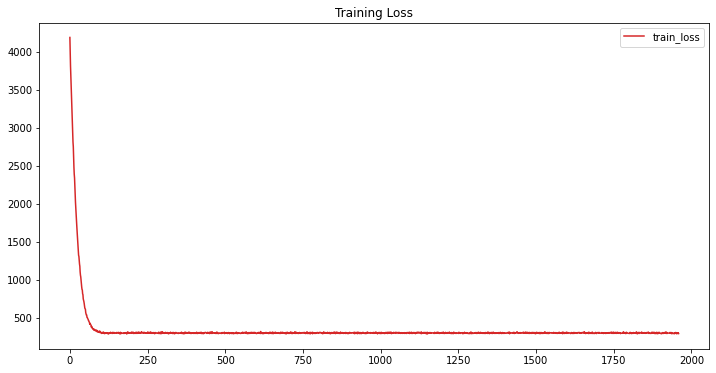

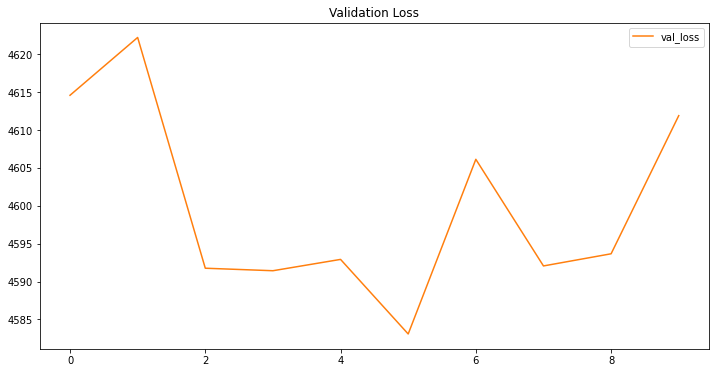

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1503.9090576171875
<class 'known.ktorch.rnn.GRU'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 07:41:20.377169
-------------------------------------------
-------------------------------------------
Final Training Loss: [27.935405904596504]
Final Validation Loss: [2998.912353515625]
End Training @ 2023-01-12 07:53:00.082984, Elapsed Time: [0:11:39.705815]


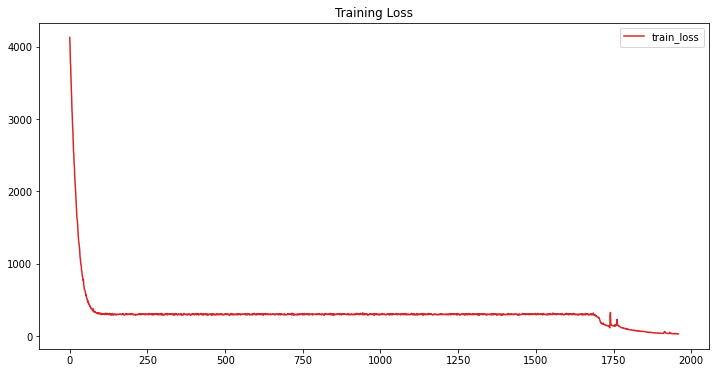

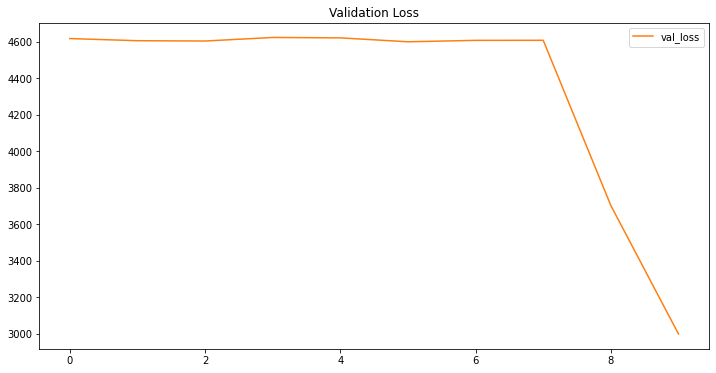

Testing samples: [480]
Testing batches: [1]
Testing Loss: 860.3742065429688
<class 'known.ktorch.rnn.JANET'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 07:53:00.414984
-------------------------------------------
-------------------------------------------
Final Training Loss: [308.42121054909444]
Final Validation Loss: [4601.15966796875]
End Training @ 2023-01-12 08:01:28.886342, Elapsed Time: [0:08:28.471358]


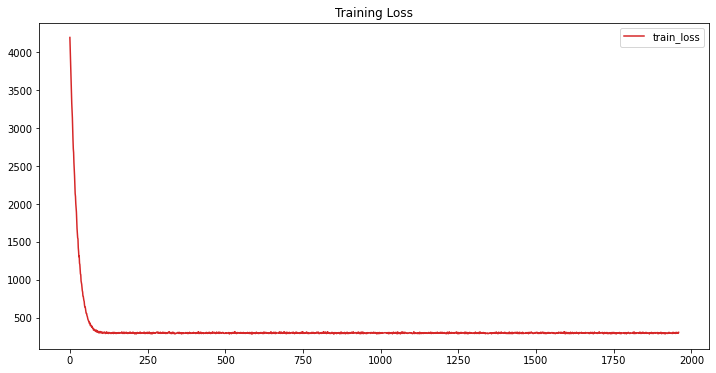

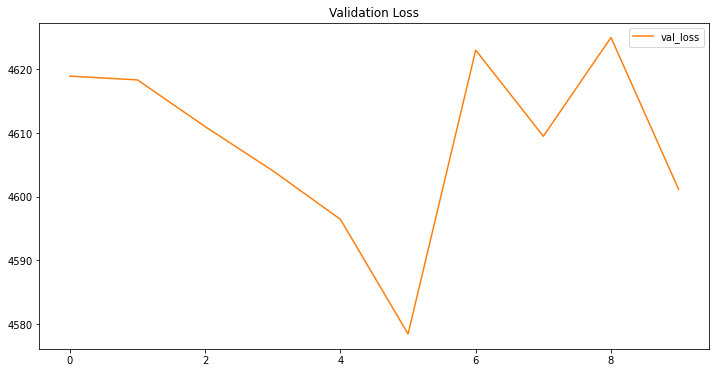

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1500.6072998046875
<class 'known.ktorch.rnn.MGU'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 08:01:29.104336
-------------------------------------------
-------------------------------------------
Final Training Loss: [300.9075428355824]
Final Validation Loss: [4596.162109375]
End Training @ 2023-01-12 08:10:00.056955, Elapsed Time: [0:08:30.952619]


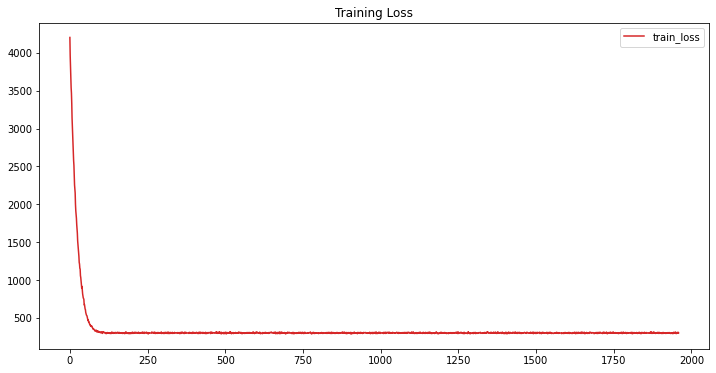

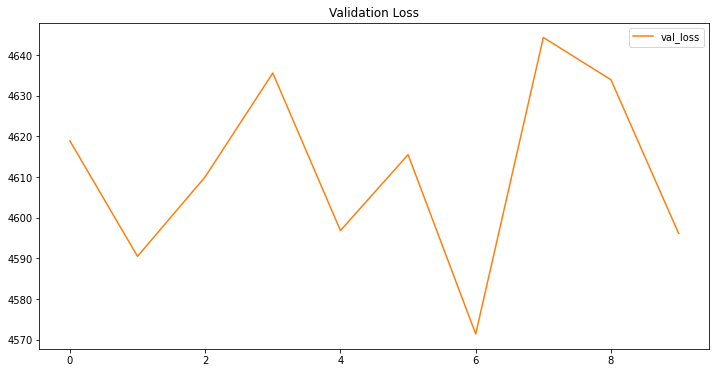

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1499.19482421875
<class 'known.ktorch.rnn.LSTM'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 08:10:00.281956
-------------------------------------------
-------------------------------------------
Final Training Loss: [300.9284598610618]
Final Validation Loss: [4578.54296875]
End Training @ 2023-01-12 08:24:30.471491, Elapsed Time: [0:14:30.189535]


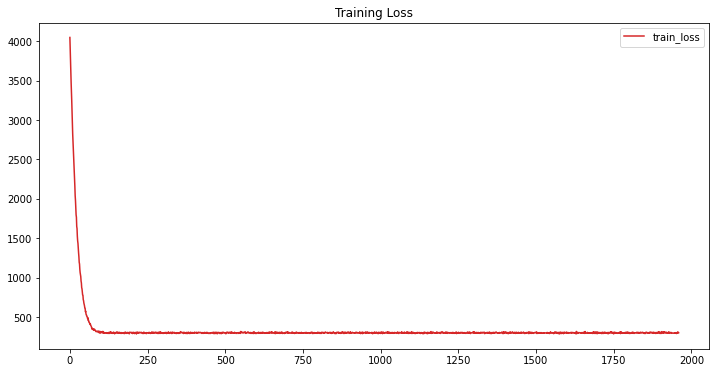

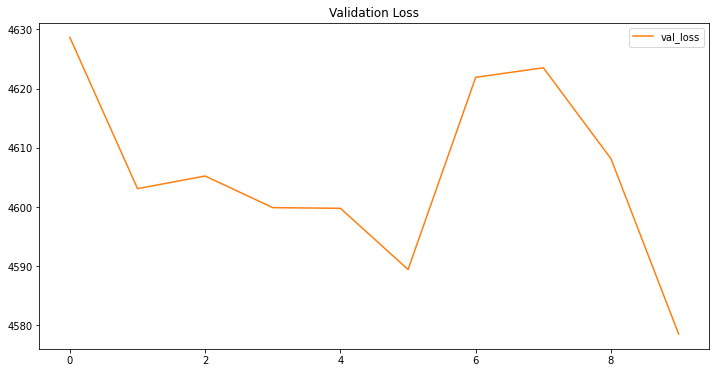

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1493.9786376953125
<class 'torch.nn.modules.rnn.RNN'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 08:24:30.709492
-------------------------------------------
-------------------------------------------
Final Training Loss: [296.9690496271307]
Final Validation Loss: [4602.0107421875]
End Training @ 2023-01-12 08:27:09.650500, Elapsed Time: [0:02:38.941008]


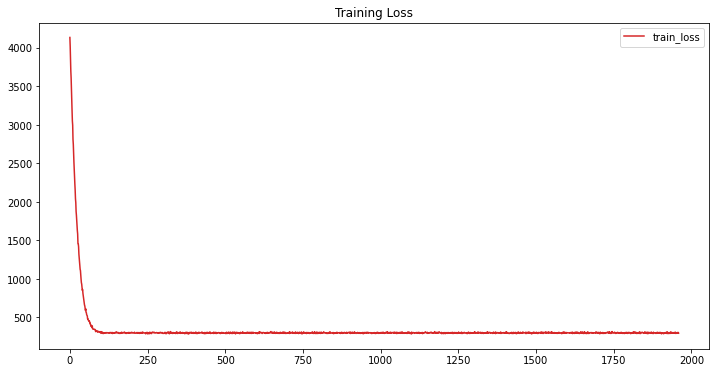

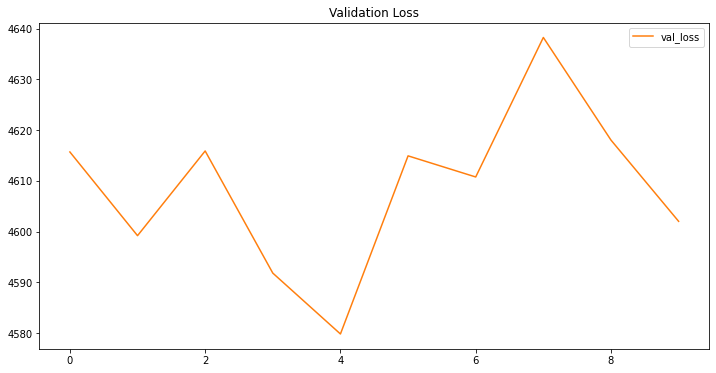

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1500.89208984375
<class 'torch.nn.modules.rnn.GRU'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 08:27:09.858480
-------------------------------------------
-------------------------------------------
Final Training Loss: [6.34613071788441]
Final Validation Loss: [2804.33740234375]
End Training @ 2023-01-12 08:33:36.046226, Elapsed Time: [0:06:26.187746]


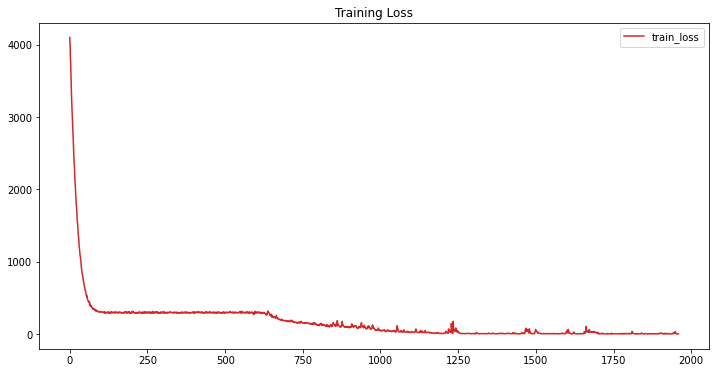

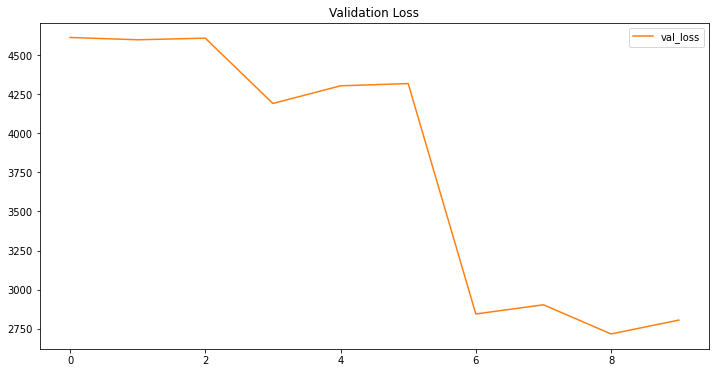

Testing samples: [480]
Testing batches: [1]
Testing Loss: 795.8060913085938
<class 'torch.nn.modules.rnn.LSTM'>
Training samples: [330]
Training batches: [11]
Validation samples: [130]
Validation batches: [1]
Start Training @ 2023-01-12 08:33:36.285843
-------------------------------------------
-------------------------------------------
Final Training Loss: [306.0009307861328]
Final Validation Loss: [4615.09375]
End Training @ 2023-01-12 08:39:55.549181, Elapsed Time: [0:06:19.263338]


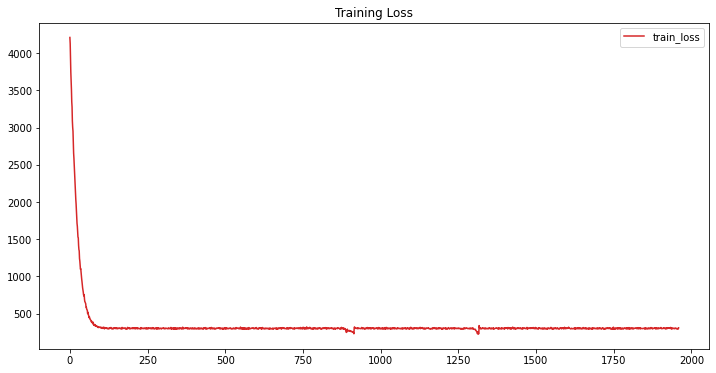

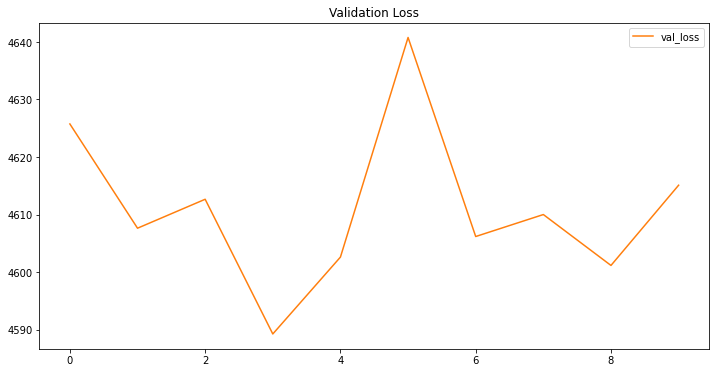

Testing samples: [480]
Testing batches: [1]
Testing Loss: 1504.63525390625


In [17]:
test_loss={}
for rnm in rnms:
    print(rnm.rnn_class)
    model=rnm
    epochs = 2000
    batch_size=32
    shuffle=True
    validation_freq = int(epochs/10)
    criterion=nn.MSELoss()
    lr = 0.005
    weight_decay = 0.0
    optimizer=oo.Adam(rnm.parameters(), lr=lr, weight_decay=weight_decay)
    lrs=oo.lr_scheduler.LinearLR(optimizer, start_factor= 1.0, end_factor=0.7, total_iters=epochs)

    early_stop_train=kt.QuantiyMonitor('TrainLoss', patience=50, delta=0.00001)
    early_stop_val=kt.QuantiyMonitor('ValLoss', patience=50, delta=0.00001)
    checkpoint_freq=int(epochs/4)
    save_path='sample.rnn'
    loss_plot_start = int(epochs/50)

    trainer = kt.Trainer(model)
    trainer.optimizer=optimizer
    trainer.criterion=criterion

    trainer.fit(training_data=ds_train, validation_data=ds_val, 
                epochs=epochs, batch_size=batch_size,shuffle=shuffle,validation_freq=validation_freq,
                verbose=1)

    trainer.plot_results(loss_plot_start=loss_plot_start)

    mtl, tl = trainer.evaluate(ds_test)

    test_loss[str(rnm.rnn_class)] = mtl
    print('=================================================')

<class 'known.ktorch.rnn.ELMAN'>:	1503.9090576171875
<class 'known.ktorch.rnn.GRU'>:	860.3742065429688
<class 'known.ktorch.rnn.JANET'>:	1500.6072998046875
<class 'known.ktorch.rnn.MGU'>:	1499.19482421875
<class 'known.ktorch.rnn.LSTM'>:	1493.9786376953125
<class 'torch.nn.modules.rnn.RNN'>:	1500.89208984375
<class 'torch.nn.modules.rnn.GRU'>:	795.8060913085938
<class 'torch.nn.modules.rnn.LSTM'>:	1504.63525390625


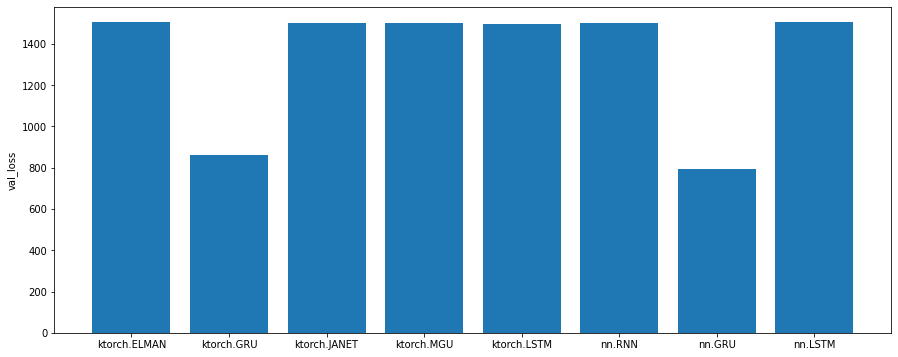

In [18]:
y = []
l = []
for k,v in test_loss.items():
    print(f'{k}:\t{v}')
    y.append(v)
    sl = k.split('.')
    l.append(sl[1]+"."+sl[-1][:-2])

x= range(len(test_loss))

plt.figure(figsize=(15,6))
plt.bar(x , y )
plt.xticks(x, l)
plt.ylabel('val_loss')
plt.show()

In [19]:
res = []
for rnm in rnms:
    print(rnm.rnn_class)
    rnm.eval()
    with tt.no_grad():
        for iv,(Xv,Yv) in enumerate(ds.dataloader(batch_size=len(ds)), 0):
            Pv = rnm(Xv)
            res.append(Pv)#print(Xv.shape, Yv.shape, Pv.shape)



<class 'known.ktorch.rnn.ELMAN'>
<class 'known.ktorch.rnn.GRU'>
<class 'known.ktorch.rnn.JANET'>
<class 'known.ktorch.rnn.MGU'>
<class 'known.ktorch.rnn.LSTM'>
<class 'torch.nn.modules.rnn.RNN'>
<class 'torch.nn.modules.rnn.GRU'>
<class 'torch.nn.modules.rnn.LSTM'>


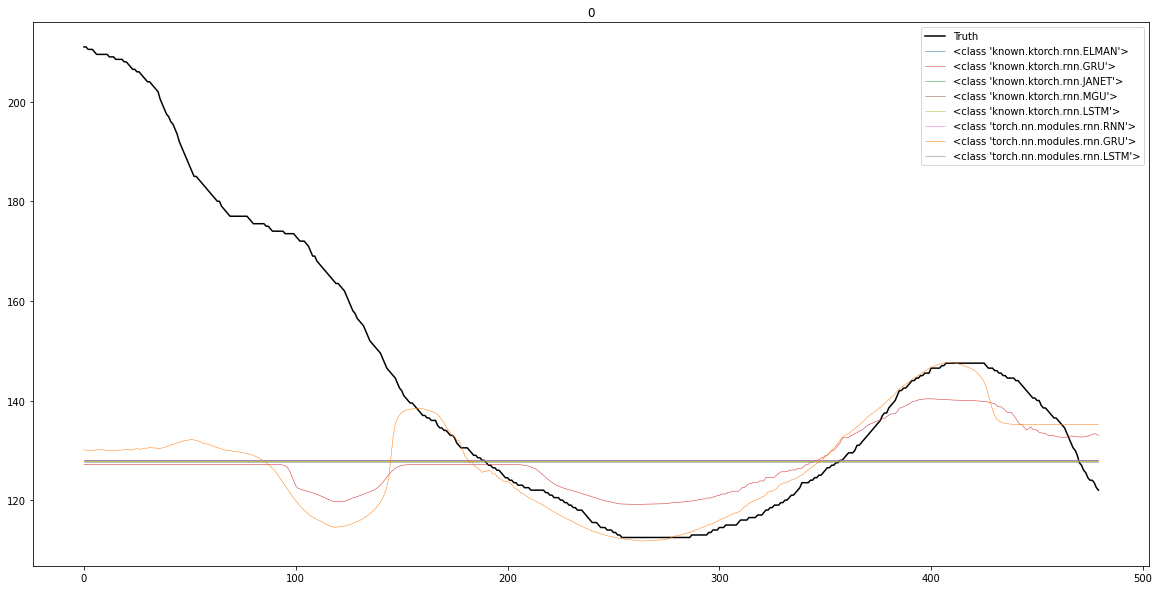

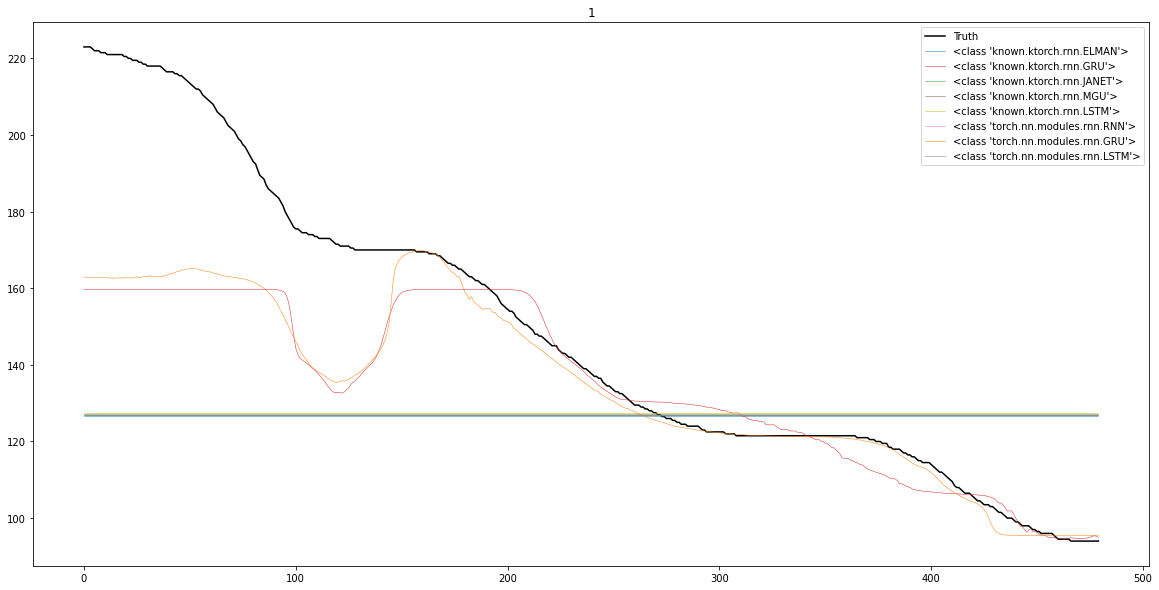

In [20]:
for i in range(input_size):
    plt.figure(figsize=(20,10))
    plt.title(f'{i}')
    
    plt.plot(Yv[:,i], color='black', label='Truth')
    for r,rnm,c in zip(res,rnms,rnmc):
        plt.plot(r[:,i], color=c, label=f'{rnm.rnn_class}', linewidth=0.5)
    plt.legend()
    plt.show()
    plt.close()
    print('=================================================')